<div class="alert alert-block alert-info">

[1. Objectives](#1st-bullet)<br>  
[2. Import Data/Libraries](#2nd-bullet)<br>  


</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 2. Import Data/Libraries
</div>

In [64]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
import warnings
warnings.filterwarnings("ignore")

We import our pre-proccessed data into our

**IF YOU IMPORT DATA_GENERAL ALL FEATURE SELECTION IS ALREADY DONE**

In [127]:
data = pd.read_csv('data_general.csv')

In [5]:
data = pd.read_csv("data_preprocessing.csv")

In [91]:
data = data.set_index("ID")

In [78]:
data.columns

Index(['Age', 'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout',
       'Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod', 'Gender_Female'],
      dtype='object')

In [80]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

non_metric_features = data.columns.drop(metric_features).to_list()

## Variable Selection: Redundancy VS Relevancy

#### Correlation Matrix:

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', varian

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/

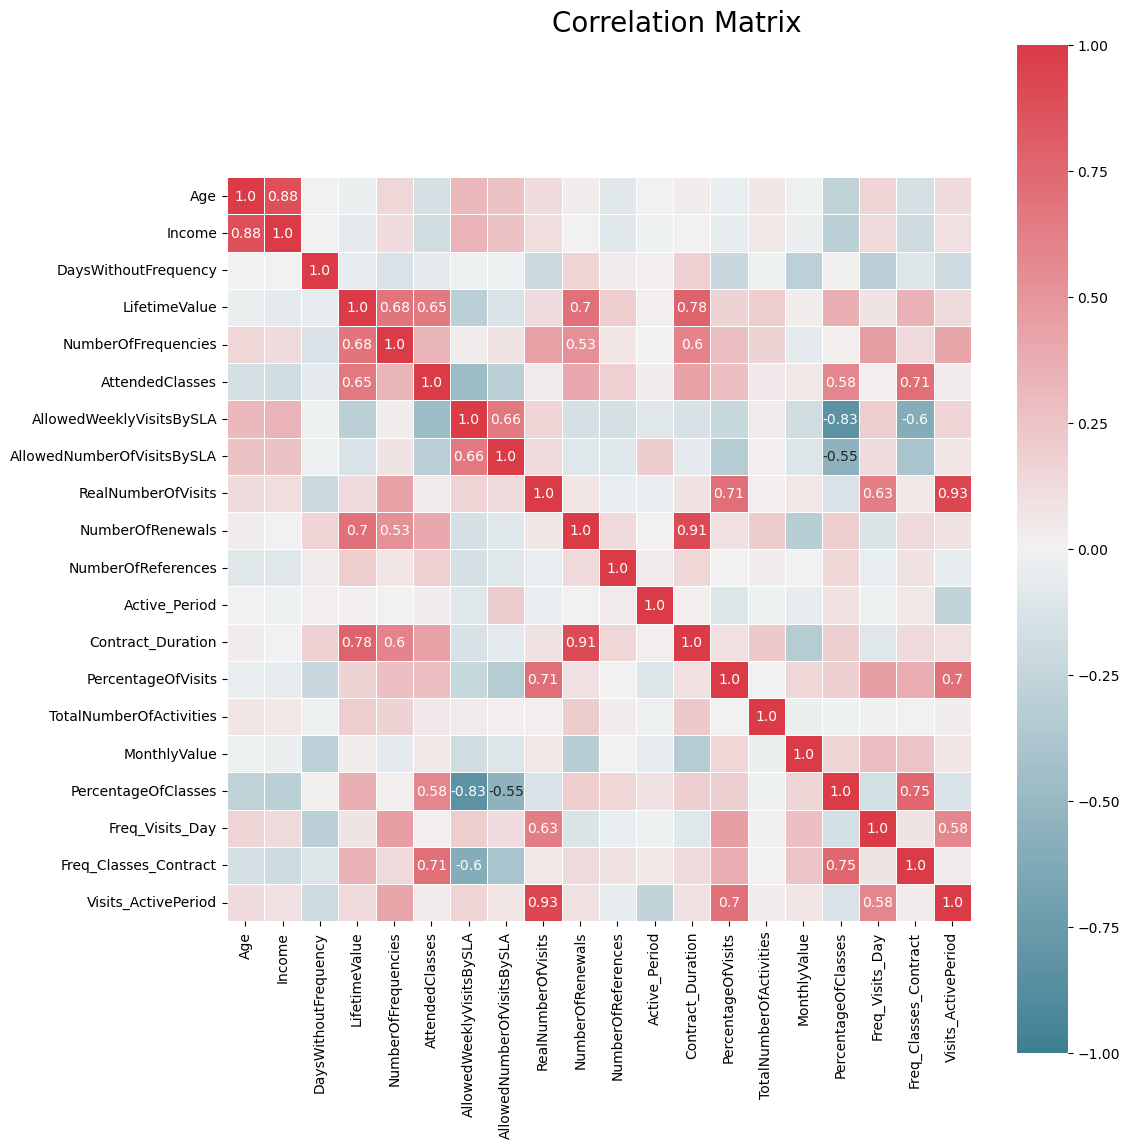

In [9]:
# Prepare figure
fig = plt.figure(figsize=(12, 12))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values)>= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'correlation_matrix.png'), dpi=200)

plt.show()

We uncover some important information:
- `Age` and  `Income` are highly correlated.
- `LifetimeValue` is also very correlated with `NumberOfRenewals`, `NumberOfFrequencies`, `AttendedClasses` and `ContractDuration`;
- `NumberOfFrequencies` is correlated with `NumberOfRenewals` and `ContractDuration`
- `AttendedClasses` is correlated with `PercentageOfClasses` and `Freq_Classes_Contract`
- `AllowedWeeklyVisitsBySLA` is highly negatively correlated with `PercentageOfClasses` and correlated with `AllowedNumberOfVisitsBySLA`
- `Visits_ActivePeriord` is highly correlated with `RealNumberOfVisits`.


1) We remove `Income` as we are looking to understand the different age groups in our sports facility.

In [10]:
data.drop("Income", axis =1, inplace = True)

2) We remove `RealNumberOfVisits` as `Visits_ActivePeriod` is more relevant to study client behaviour as it is a value that is defined in the same time frame for all clients.

In [11]:
data.drop("RealNumberOfVisits", axis =1, inplace = True)

3) We drop `DaysWithoutFrequency` as it has no correlation with other variables and can be considered "noise"

In [12]:
data.drop("DaysWithoutFrequency", axis =1, inplace = True)

5) For the same reasons we drop `TotalNumberOfActivities`, `MonthlyValue`, `ActivePeriod` and `NumberOfReferences`

In [13]:
data.drop(["TotalNumberOfActivities","MonthlyValue", "Active_Period", "NumberOfReferences" , "HasReferences"], axis =1, inplace = True)

Since we drop `NumberOfReferences` and `HasReferences` is related with this variable and highly unbalanced, we decide to drop it too.

6) We drop `LifetimeValue` as it has correlations with many other variable and can be considered redunctant.

In [14]:
data.drop("LifetimeValue", axis =1, inplace = True)

7) Between `AttendedClasses` , `Freq_Classes_Contract` and `PercentageOfClasses`:

In [15]:
data.drop("AttendedClasses", axis =1, inplace = True)

8) `AllowedWeeklyVisitsBySLA` and `AllowedNumberOfVisitsBySLA` and ``RealNumberOfVisits

In [16]:
data.drop("AllowedWeeklyVisitsBySLA", axis =1, inplace = True)
data.drop("AllowedNumberOfVisitsBySLA", axis =1, inplace = True)

9) Between `NumberOfRenewals` and `ContractDuration`, the second variable is kept as we have no information about the renewal process of the company.

In [17]:
data.drop("NumberOfRenewals", axis =1, inplace = True)

10) `NumberOfFrequencies` is droped once we have other variables such as `Freq_Visits_Day` that offers a more informative insight about the data

In [18]:
data.drop("NumberOfFrequencies", axis =1, inplace = True)

11) `Freq_Classes_Contract` is droped because has a high correlation with `PercentageOfClasses`

In [19]:
data.drop("Freq_Classes_Contract", axis =1, inplace = True)

In [128]:
# update metric and non metric features
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses','Freq_Visits_Day', 'Visits_ActivePeriod']
non_metric_features = data.columns.drop(metric_features).to_list()

In [129]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']


### Detection of outliers through DBSCAN

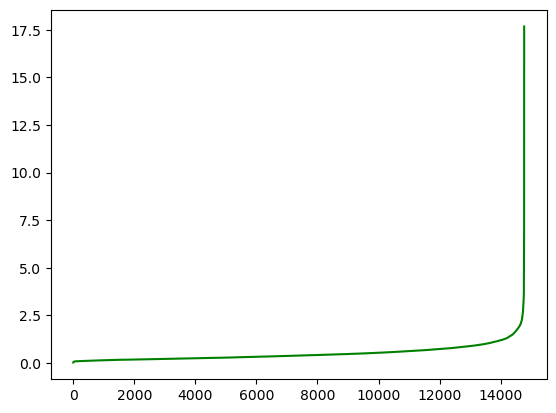

In [22]:
# epsilon of 2.2
neigh = NearestNeighbors(n_neighbors = (2 * len(metric_features)) - 1)
neigh.fit(data[metric_features])
distances, _ = neigh.kneighbors(data[metric_features])
distances = np.sort(distances[:, -1])
#plt.yticks(np.arange(1,22,0.5))
plt.plot(distances, color = 'green')
plt.show()

In [131]:
from collections import Counter

from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=1.4, min_samples = 2 * len(metric_features), n_jobs = -1)
dbscan_labels = dbscan.fit_predict(data[metric_features])

Counter(dbscan_labels)

Counter({0: 14538, -1: 235})

In [132]:
data.shape

(14773, 18)

In [133]:
#data = pd.concat([data, pd.Series(dbscan_labels, name = 'dbscan_labels', index = data.index)], axis =1)
data_dbscan_out = data[dbscan_labels == -1]
data = data[dbscan_labels != -1]

In [134]:
general_perspective = metric_features
compare = ['UseByTime','Dropout', 'Gender_Female']
df_activities = data[activities].copy()
df_general = data[general_perspective].copy()
df_compare = data[compare].copy()

## K-Means

In [29]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_general[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/

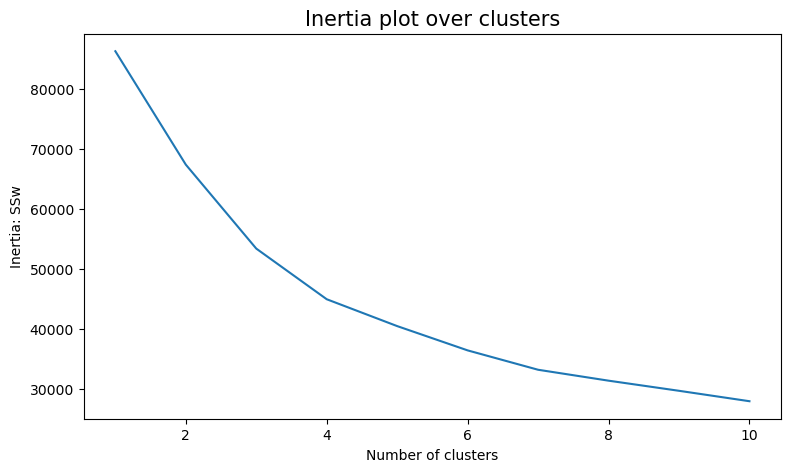

In [30]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.33730838119454676
For n_clusters = 3, the average silhouette_score is : 0.31865683542467
For n_clusters = 4, the average silhouette_score is : 0.3211716471742339
For n_clusters = 5, the average silhouette_score is : 0.322247362964298
For n_clusters = 6, the average silhouette_score is : 0.2863104526131558
For n_clusters = 7, the average silhouette_score is : 0.29250212811153353
For n_clusters = 8, the average silhouette_score is : 0.2972155638160584
For n_clusters = 9, the average silhouette_score is : 0.2635096274152393
For n_clusters = 10, the average silhouette_score is : 0.2675538577120499


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/

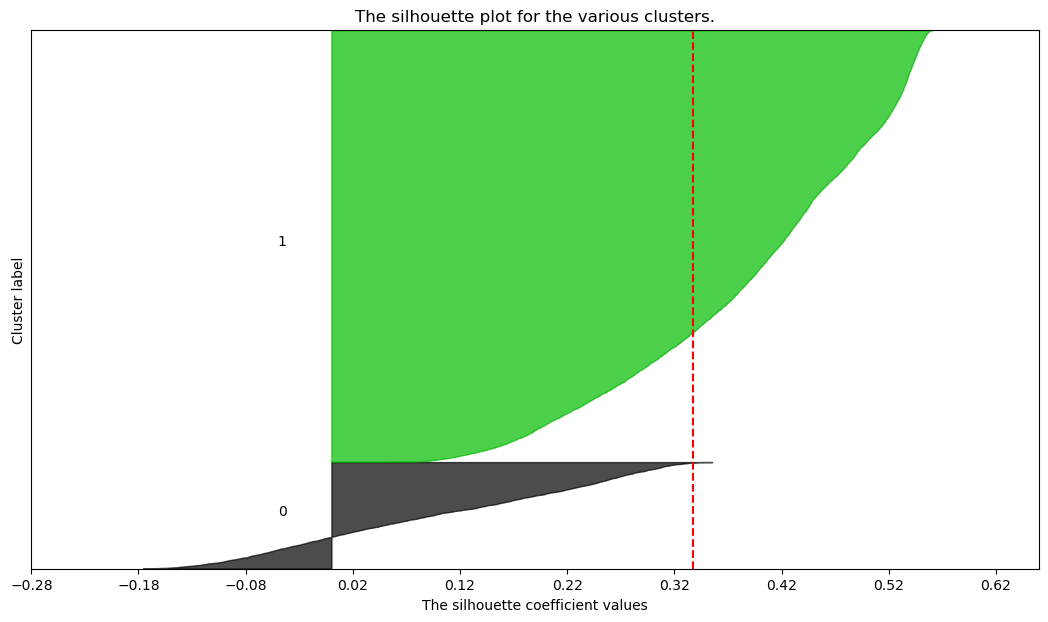

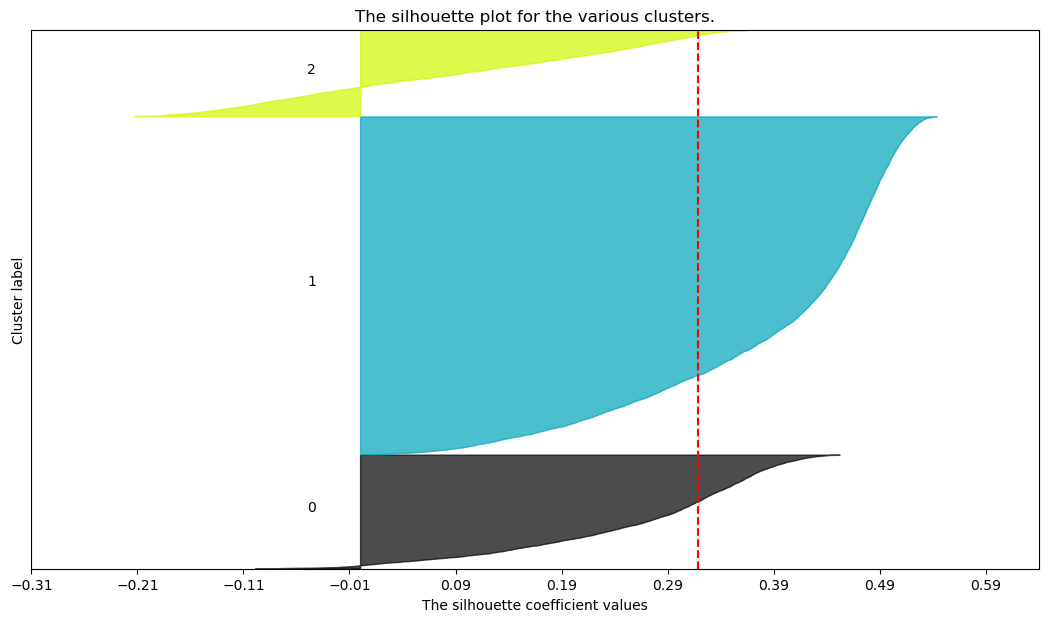

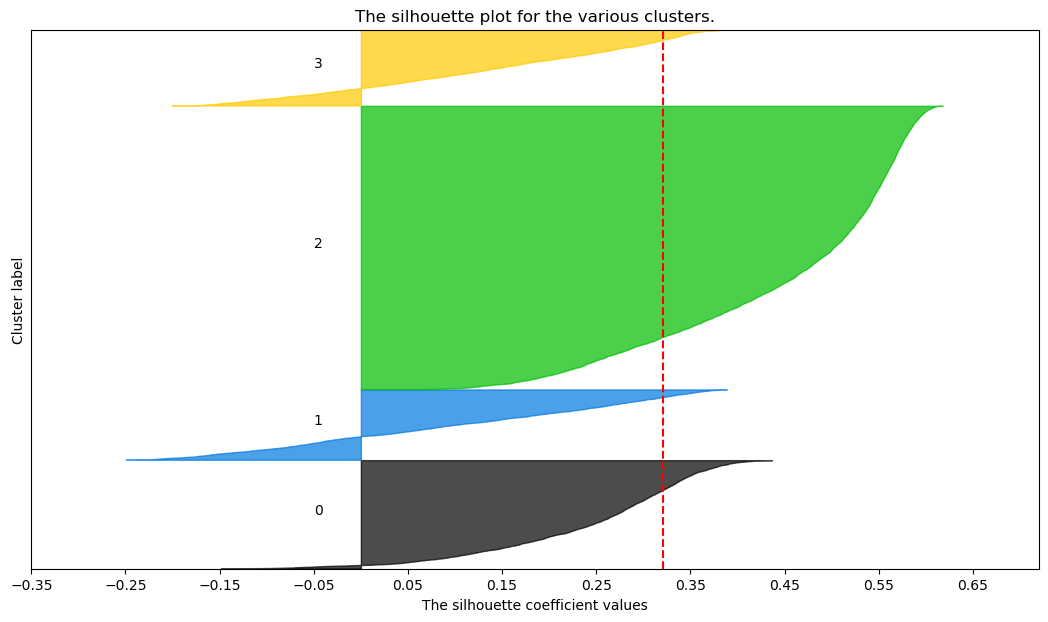

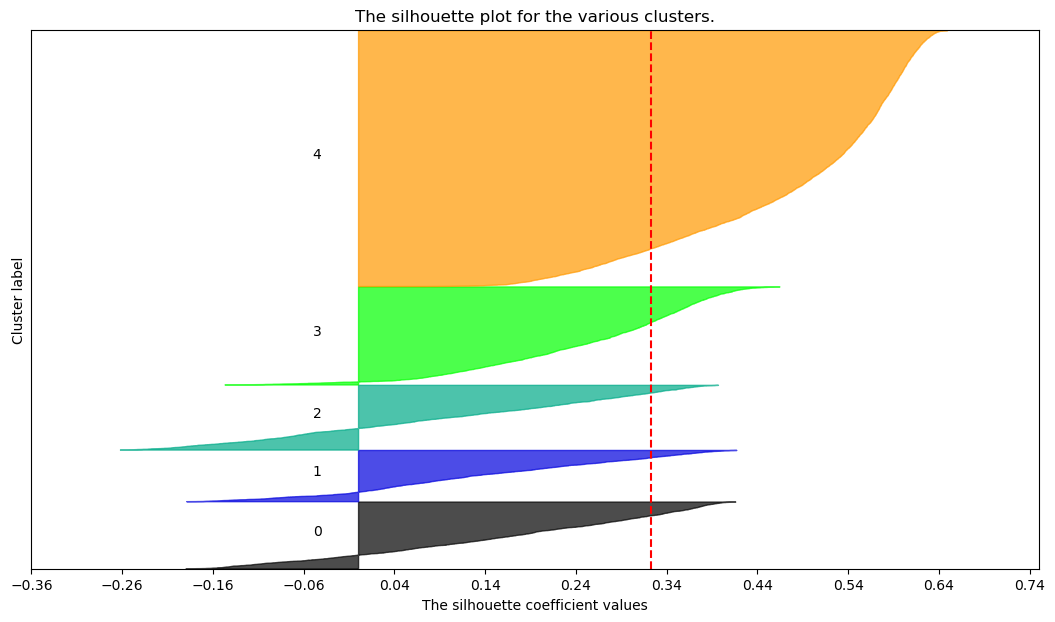

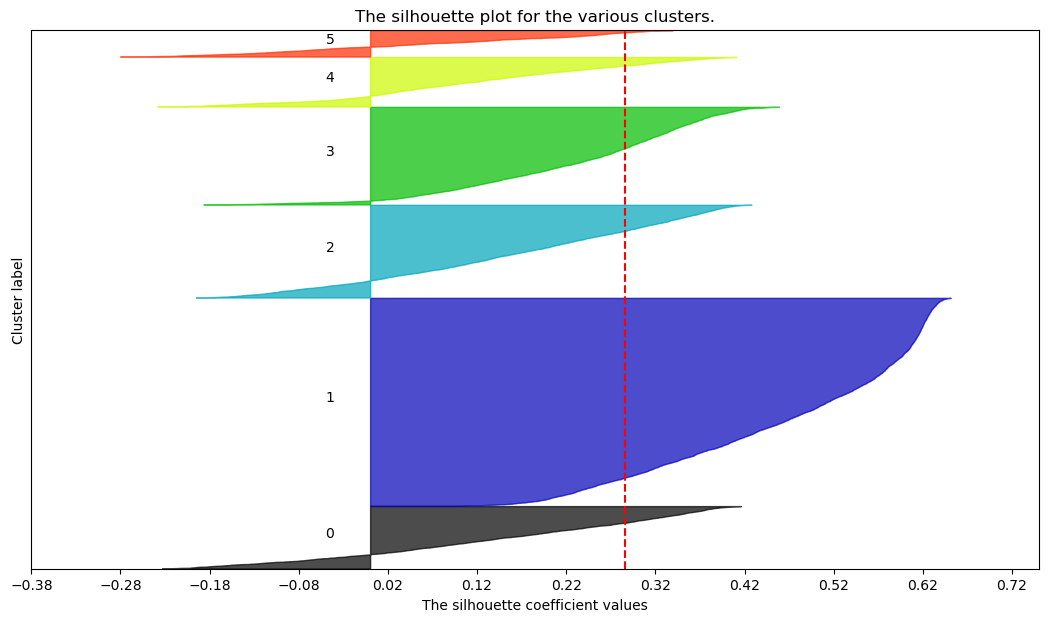

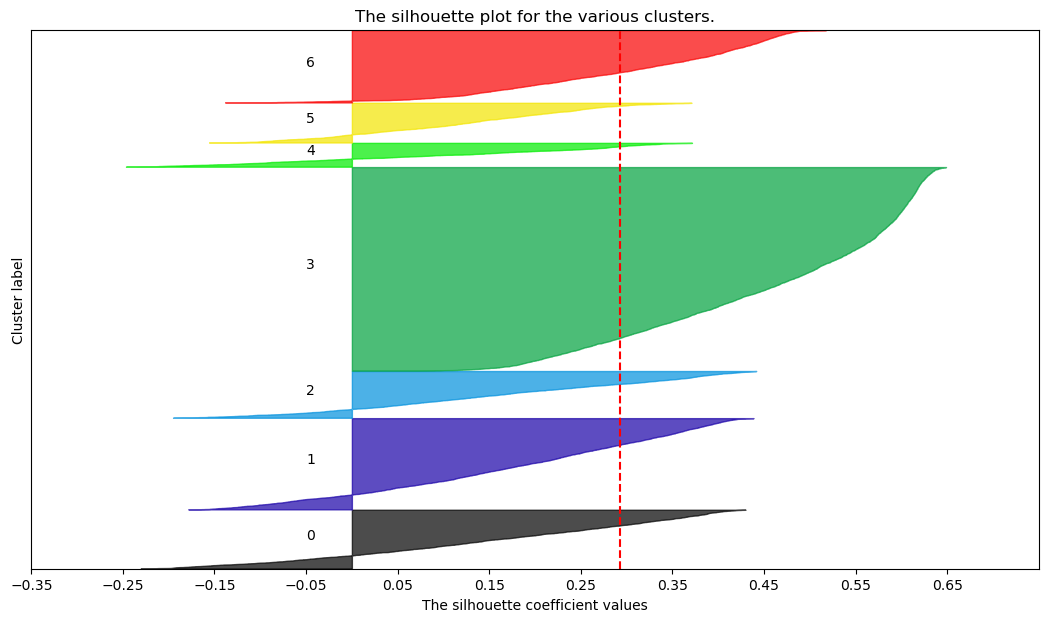

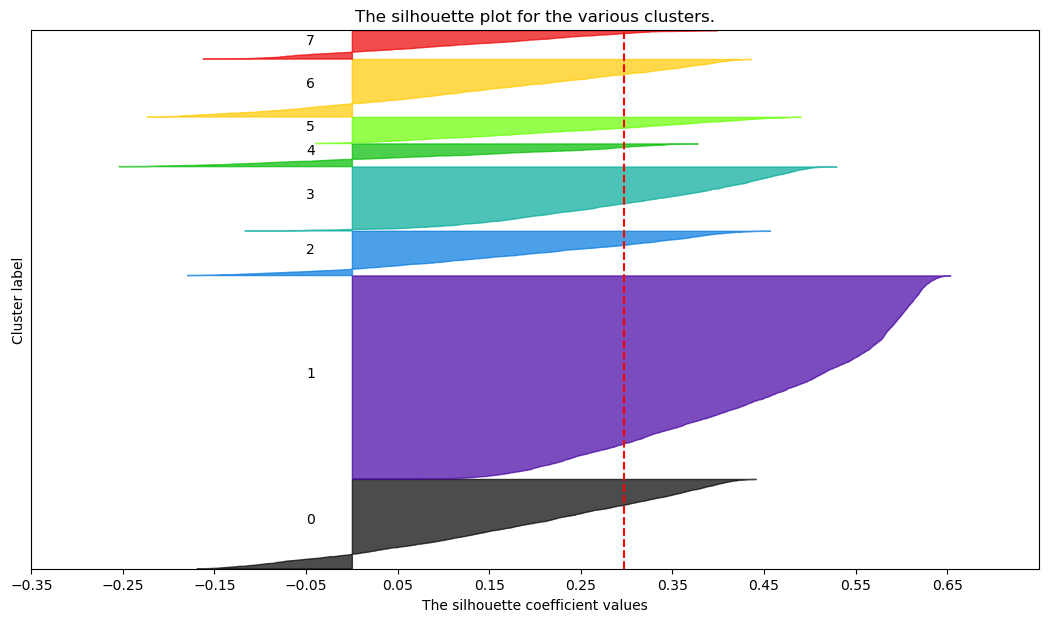

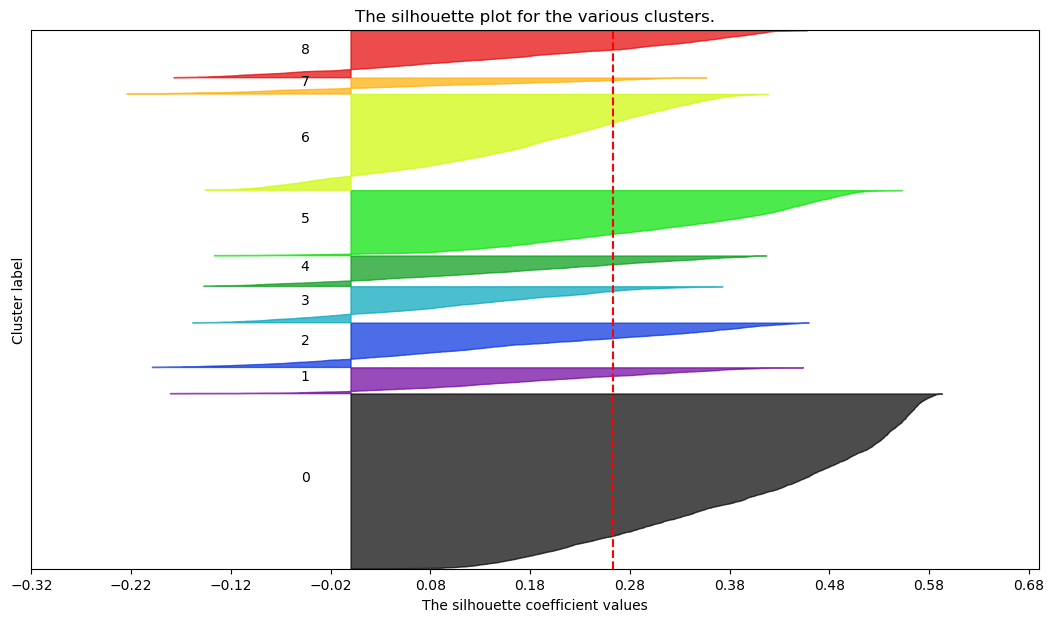

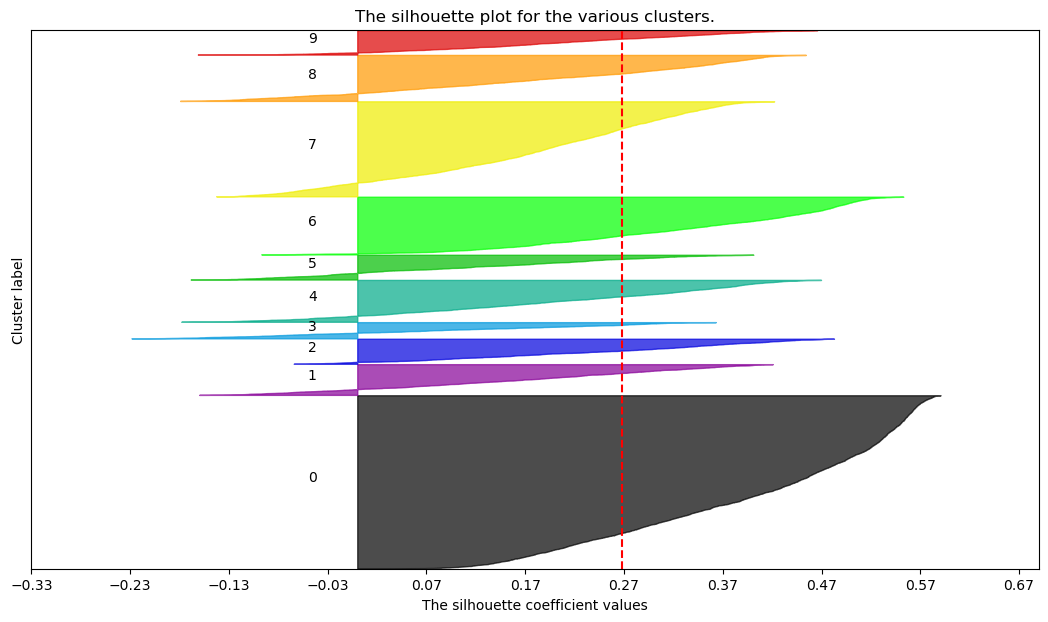

In [31]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_general[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_general[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_general[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_general[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

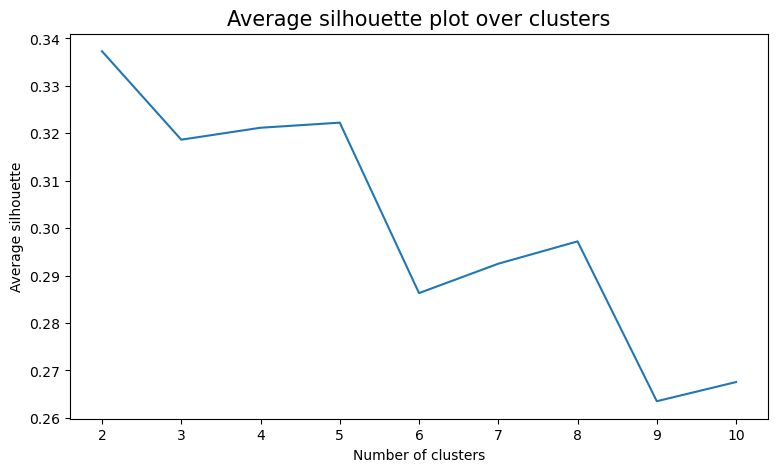

In [32]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; Why range_clusters[1:] ? Remember we skipped k=1 in the cell above
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [33]:
# final cluster solution
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_general[metric_features])
km_labels

array([3, 2, 2, ..., 1, 1, 1], dtype=int32)

In [34]:
# Characterizing the final clusters
df_concat = pd.concat((df_general, pd.Series(km_labels, name='labels', index=df_general.index)), axis=1)
df_concat.groupby('labels').mean()

Age  Contract_Duration  PercentageOfVisits  PercentageOfClasses  \
labels                                                                         
0      -0.826321           0.666862            0.517620             2.151567   
1       0.585967           0.325520            1.533938             0.234040   
2       0.038832           0.112568           -0.055923             0.025563   
3       2.313789           0.569720           -0.013564             0.519293   

        Freq_Visits_Day  Visits_ActivePeriod  
labels                                        
0             -0.090761            -0.072010  
1              1.730748             2.229025  
2              0.048540            -0.006889  
3              0.151914            -0.035573

In [35]:
cluster_means = df_concat.groupby('labels').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

In [36]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [37]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat[metric_features])  # get total sum of squares
ssw_labels = df_concat[metric_features + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.47895667092601074

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/

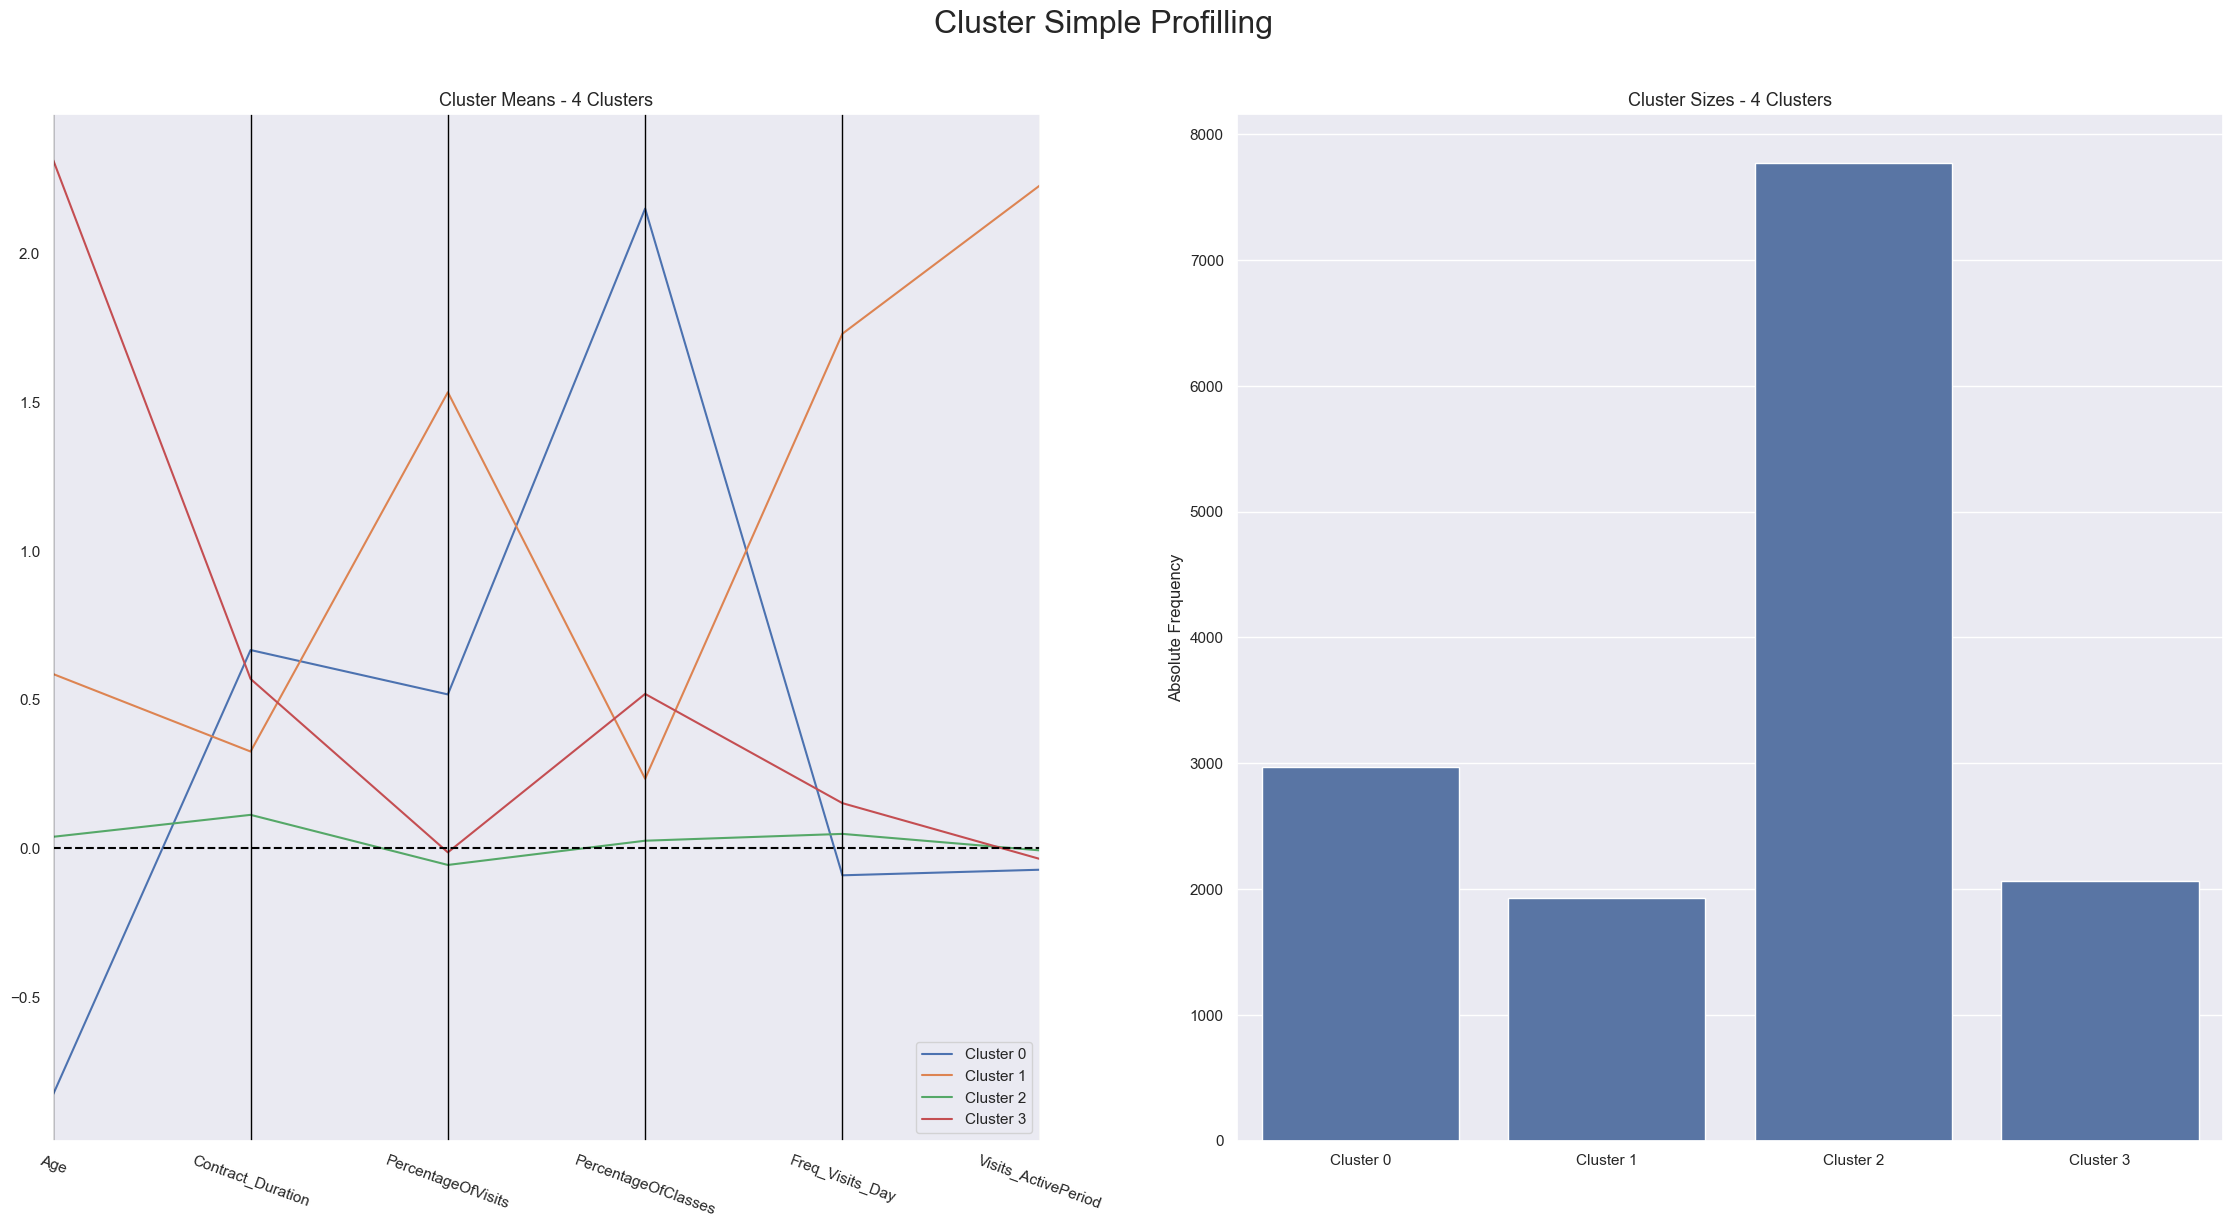

In [38]:
cluster_profiles(
    df = df_concat[metric_features + ["labels"]], 
    label_columns = ["labels"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

## K means + Hierarchial clustering

In [39]:
from sklearn.cluster import KMeans


def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [40]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_general, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_general, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2  0.219025  0.146594  0.004150  0.000469  0.168877
3  0.381156  0.160850  0.140353  0.001550  0.296483
4  0.478957  0.173024  0.151791  0.002046  0.385265
5  0.530824  0.284203  0.152013  0.004393  0.444234
6  0.577722  0.287106  0.153650  0.004773  0.499722
7  0.615128  0.301918  0.200299  0.005415  0.539658
8  0.636229  0.364574  0.215663  0.005809  0.570491
9  0.657115  0.368153  0.217706  0.006202  0.595708

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=21.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/

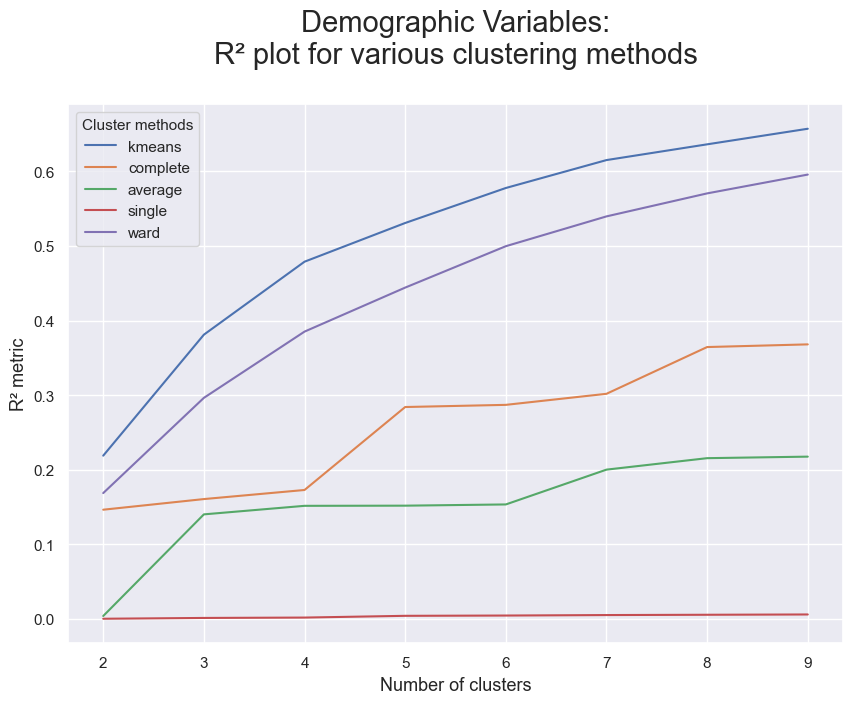

In [41]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [42]:
from sklearn.cluster import KMeans


kmeans_attendance = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    random_state=42
)
attendance_labels = kmeans_attendance.fit_predict(df_general)
data['attendance_labels'] = attendance_labels


In [43]:
df_centroids = data.groupby(['attendance_labels'])\
    [metric_features].mean()
df_centroids

Age  Contract_Duration  PercentageOfVisits  \
attendance_labels                                                    
0                  0.585967           0.325520            1.533938   
1                  2.313789           0.569720           -0.013564   
2                 -0.826321           0.666862            0.517620   
3                  0.038832           0.112568           -0.055923   

                   PercentageOfClasses  Freq_Visits_Day  Visits_ActivePeriod  
attendance_labels                                                             
0                             0.234040         1.730748             2.229025  
1                             0.519293         0.151914            -0.035573  
2                             2.151567        -0.090761            -0.072010  
3                             0.025563         0.048540            -0.006889

In [44]:
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

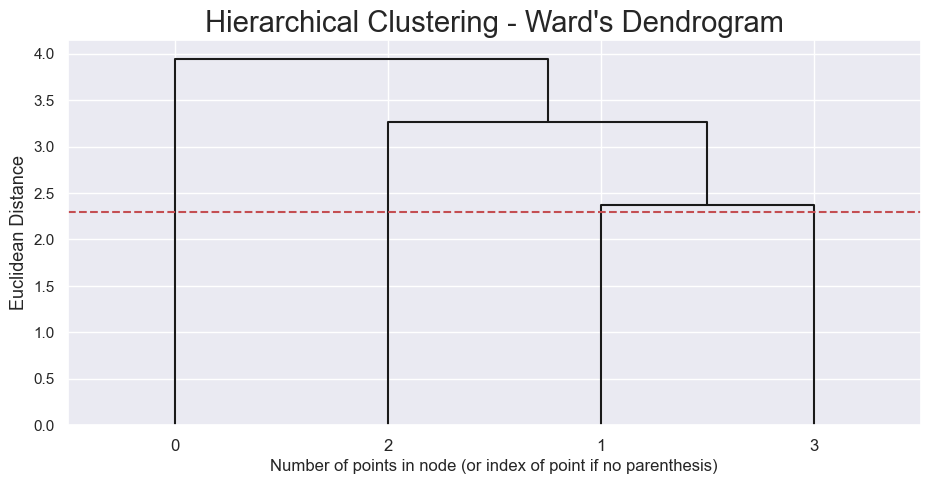

In [45]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.3
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [46]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age  Contract_Duration  PercentageOfVisits  \
attendance_labels                                                    
0                  0.585967           0.325520            1.533938   
1                  2.313789           0.569720           -0.013564   
2                 -0.826321           0.666862            0.517620   
3                  0.038832           0.112568           -0.055923   

                   PercentageOfClasses  Freq_Visits_Day  Visits_ActivePeriod  \
attendance_labels                                                              
0                             0.234040         1.730748             2.229025   
1                             0.519293         0.151914            -0.035573   
2                             2.151567        -0.090761            -0.072010   
3                             0.025563         0.048540            -0.006889   

                   hclust_labels  
attendance_labels                 
0                              3  
1                              1  
2                              2  
3                              0

In [47]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


findfont: Matching sans\-serif:style=normal:variant=normal:weight=heavy:stretch=normal:size=13.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/p

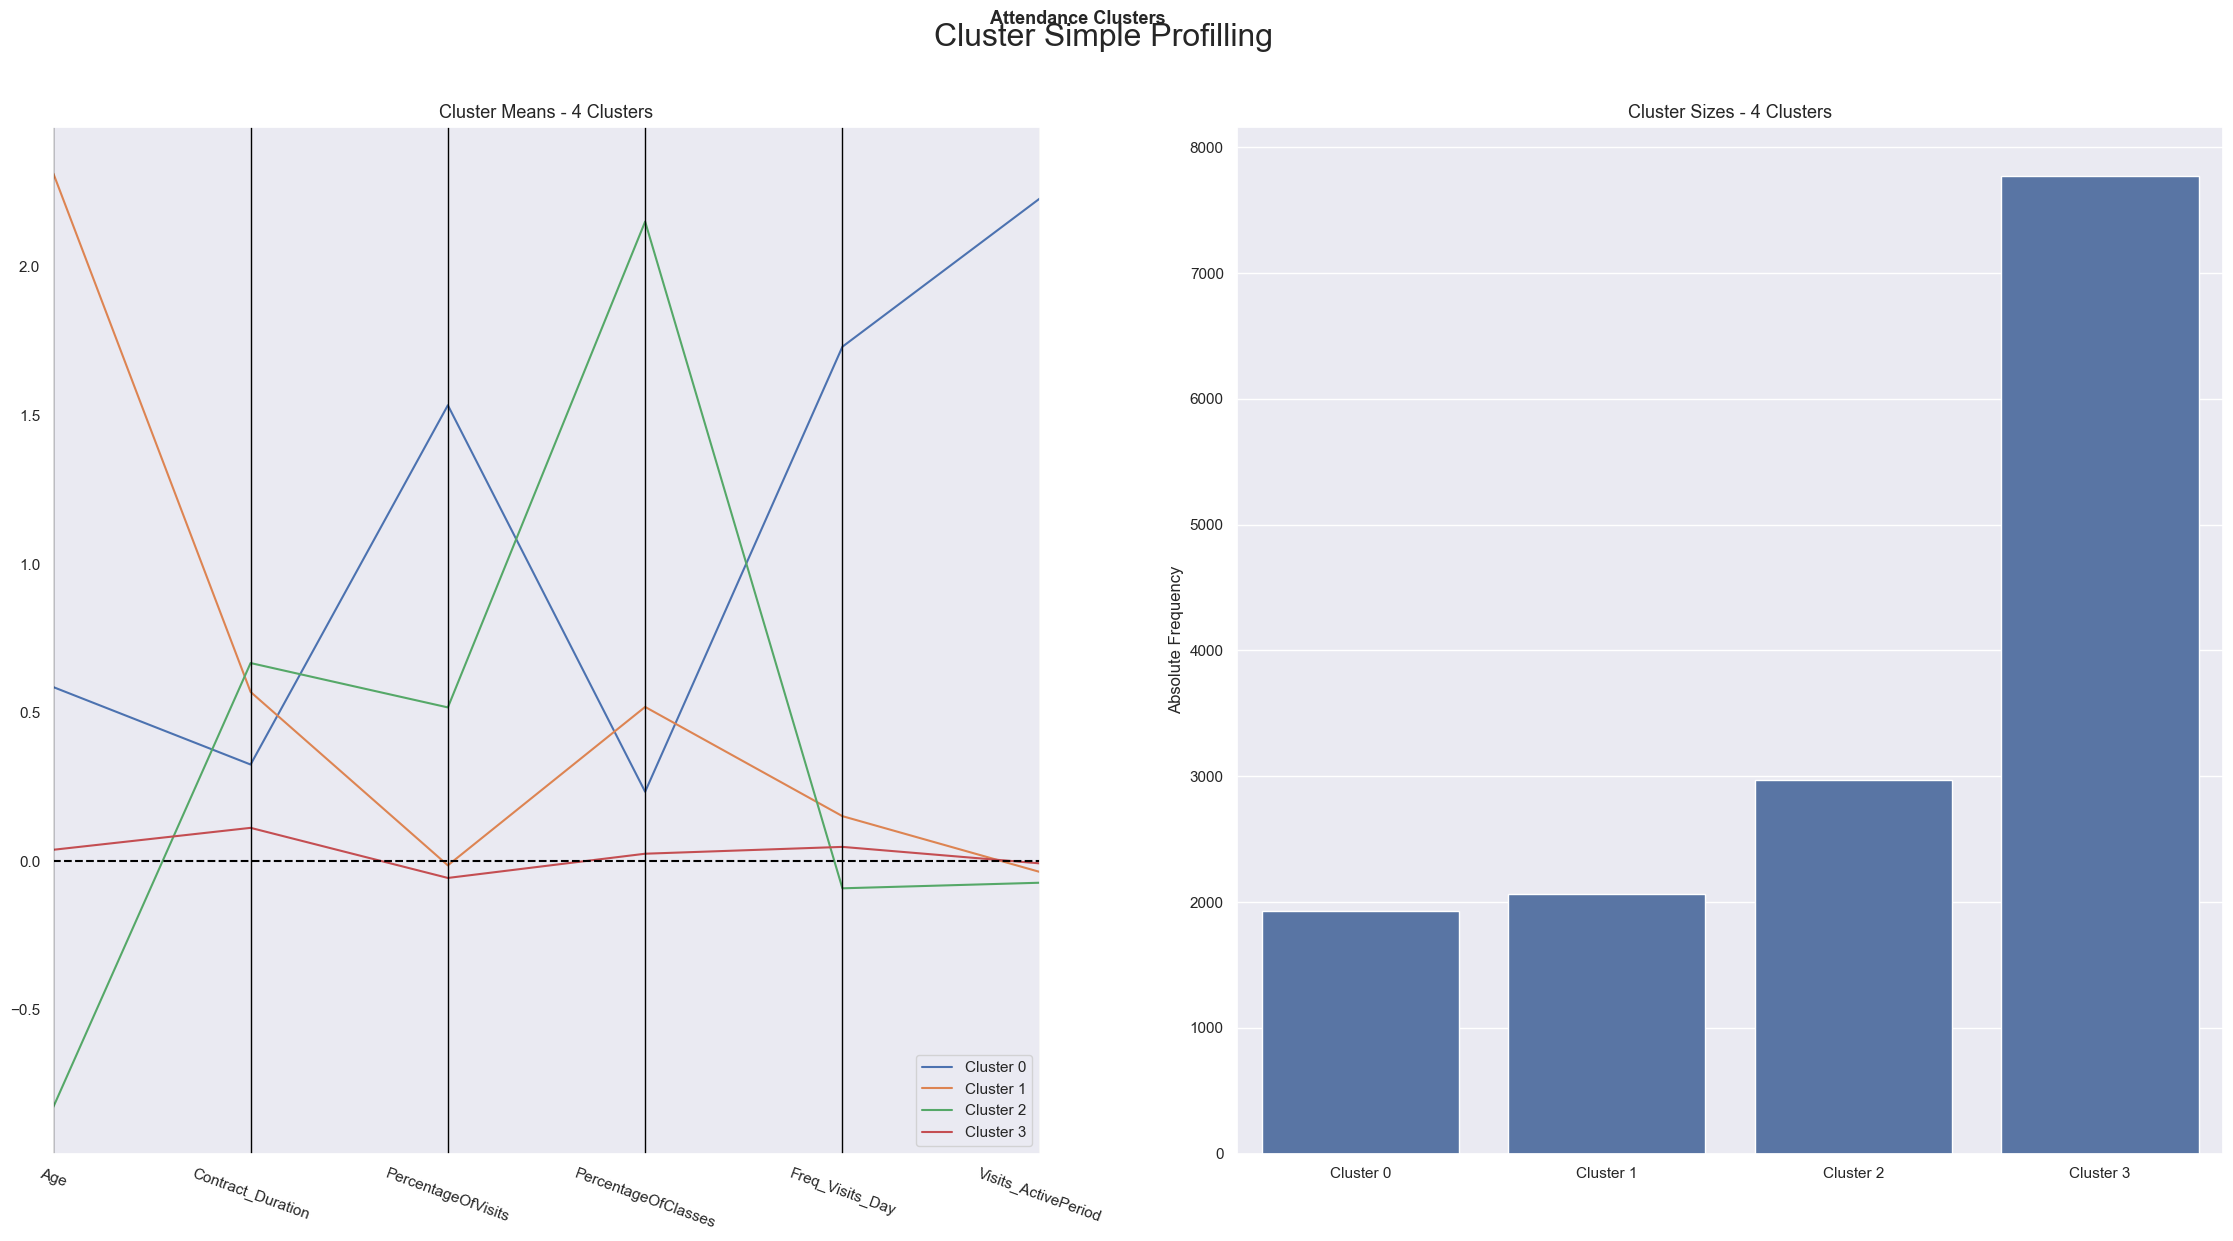

In [48]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = data[metric_features + ['attendance_labels']],
    label_columns = ['attendance_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Attendance Clusters"]
)

In [49]:
df_compare = data[['attendance_labels','UseByTime', 'Dropout', 'Gender_Female']].groupby(['attendance_labels']).sum()

df_compare

UseByTime  Dropout  Gender_Female
attendance_labels                                   
0                        134     1300           1019
1                        145     1666           1302
2                         25     2039           1705
3                        392     7098           4794

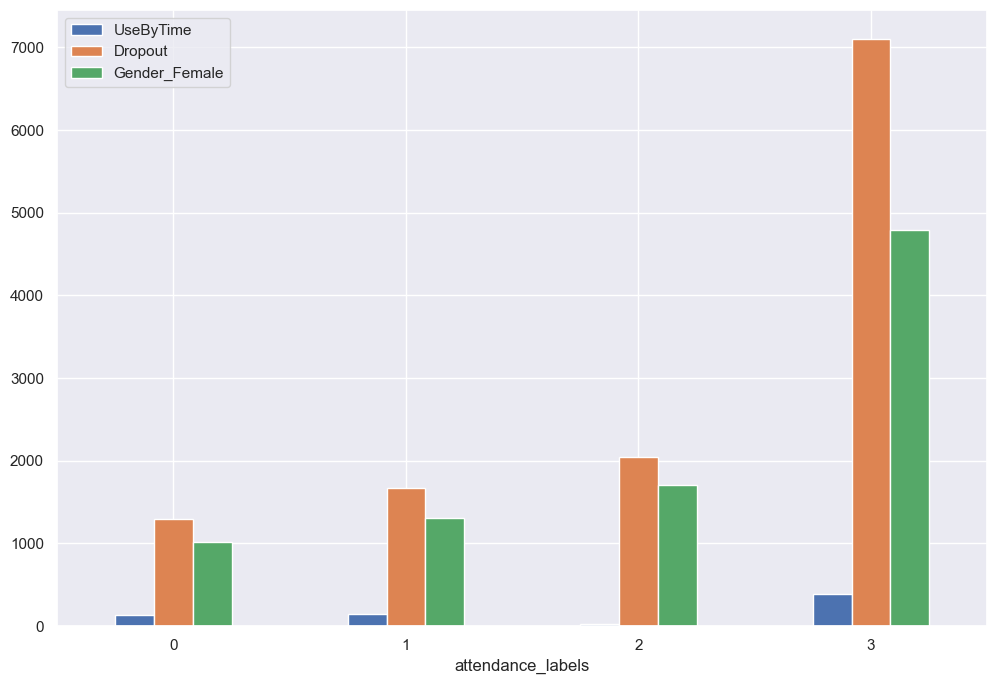

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
df_compare.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

In [51]:
df_activities = data[['attendance_labels','AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities']].groupby(['attendance_labels']).sum()

df_activities

AthleticsActivities  WaterActivities  FitnessActivities  \
attendance_labels                                                            
0                                 17.0            454.0             1422.0   
1                                 19.0            608.0             1330.0   
2                                 11.0           2122.0              124.0   
3                                 61.0           1125.0             5682.0   

                   TeamActivities  RacketActivities  CombatActivities  \
attendance_labels                                                       
0                            31.0              21.0              90.0   
1                            48.0              34.0             134.0   
2                           546.0             249.0             111.0   
3                           173.0              42.0            1261.0   

                   SpecialActivities  OtherActivities  
attendance_labels                                      
0                              104.0              3.0  
1                              177.0              7.0  
2                               27.0              6.0  
3                               70.0             12.0

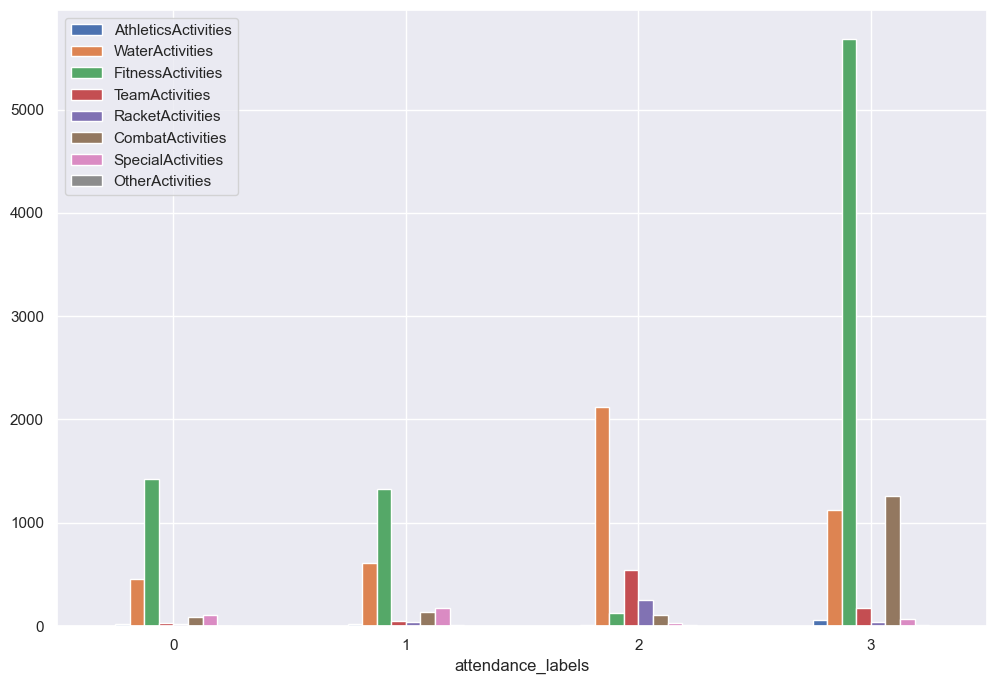

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
df_activities.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

### SOM + K-means clustering

In [53]:
sm = sompy.SOMFactory().build(
    df_general.values, 
    mapsize=[50, 50],
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)
sm.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  6.237000, quantization error: 1.578947

 epoch: 2 ---> elapsed time:  5.913000, quantization error: 2.179240

 epoch: 3 ---> elapsed time:  6.333000, quantization error: 2.154505

 epoch: 4 ---> elapsed time:  6.123000, quantization error: 2.145272

 epoch: 5 ---> elapsed time:  6.263000, quantization error: 2.140666

 epoch: 6 ---> elapsed time:  6.479000, quantization error: 2.137605

 epoch: 7 ---> elapsed time:  6.247000, quantization error: 2.134150

 epoch: 8 ---> elapsed time:  6.175000, quantization error: 2.131565

 epoch: 9 ---> elapsed time:  7.522000, quantization error: 2.129228

 epoch: 10 ---> elapsed time:  7.124000, quantization error: 2.126370

 epoch: 11 ---> elapsed time:  5.422000, quantization error: 2.122371

 epoch: 12 ---> elapsed time:  6.524000, quantization error: 2.118163

 epoch: 13 ---> 

In [54]:
range_clusters = range(2, 10)

inertia = []
for n_clus in range_clusters: 
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(df_general)
    inertia.append(kmclust.inertia_)  

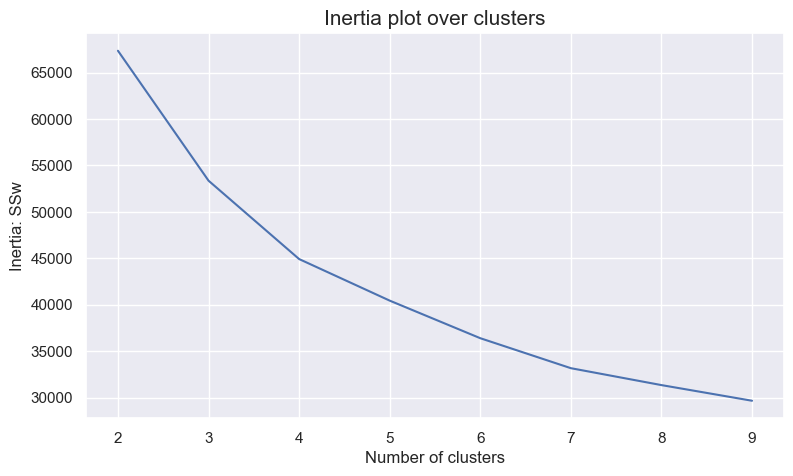

In [55]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

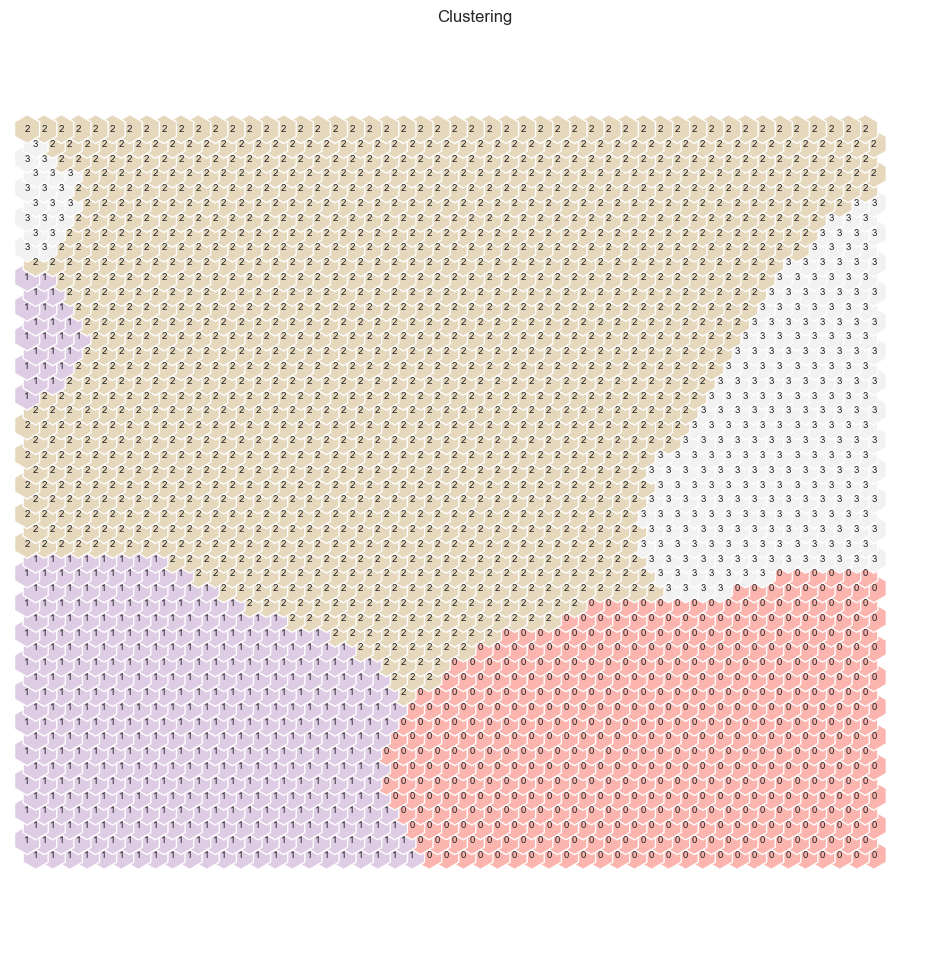

In [56]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

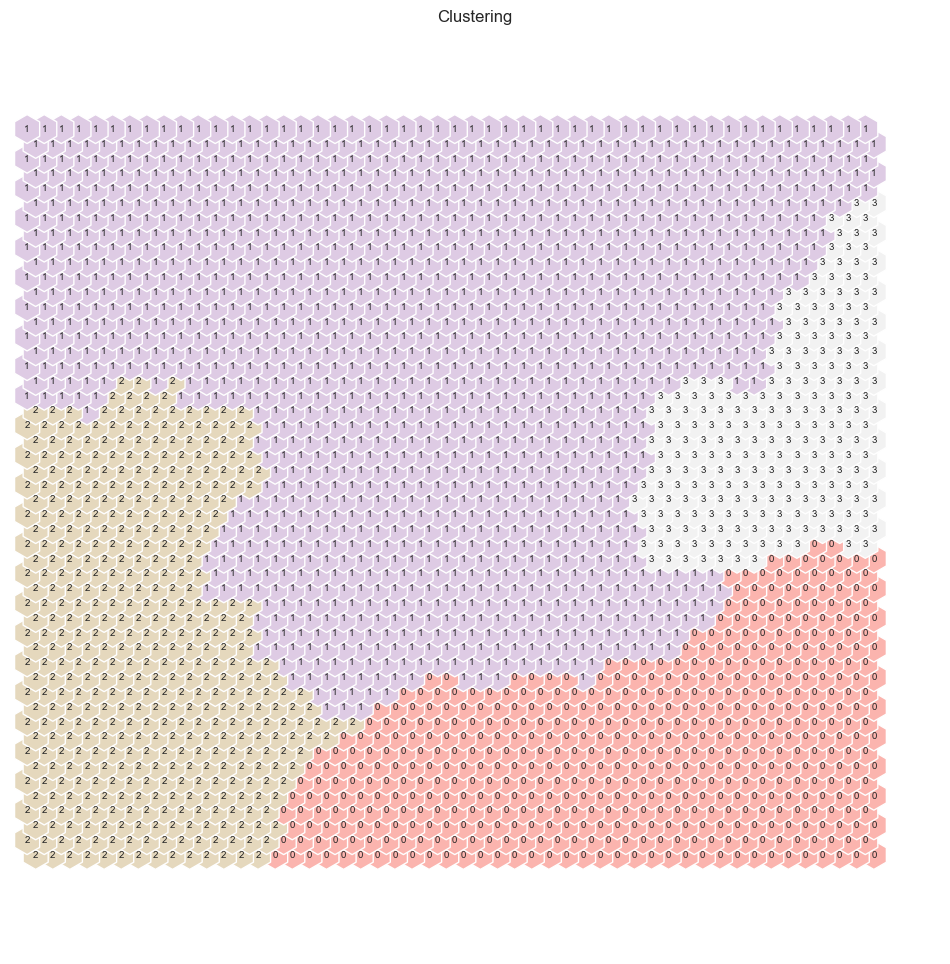

In [57]:
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels 

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [58]:
# Check the nodes and and respective clusters
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=metric_features)
df_nodes['label'] = nodeclus_labels
df_nodes

Age  Contract_Duration  PercentageOfVisits  PercentageOfClasses  \
0     0.209958          -0.188511           -0.810935            -0.565970   
1     0.105926          -0.154045           -0.823025            -0.567176   
2    -0.024448          -0.143320           -0.833965            -0.563052   
3    -0.170028          -0.151543           -0.830691            -0.571117   
4    -0.320393          -0.190240           -0.836630            -0.574310   
...        ...                ...                 ...                  ...   
2495  2.120411           0.067134            1.692314            -0.519534   
2496  1.667268           0.170266            2.002994            -0.515766   
2497  1.088754           0.496753            2.368503            -0.520140   
2498  0.743234           0.793725            2.659854            -0.523925   
2499  0.963752           1.353702            2.631724            -0.520213   

      Freq_Visits_Day  Visits_ActivePeriod  label  
0           -0.882669            -0.740485      1  
1           -0.888775            -0.749402      1  
2           -0.921742            -0.759726      1  
3           -0.954005            -0.754168      1  
4           -0.975924            -0.760365      1  
...               ...                  ...    ...  
2495         2.195859             3.672117      2  
2496         2.256645             4.209992      2  
2497         2.092657             4.834008      2  
2498         2.081337             5.394395      2  
2499         2.714873             5.744028      2  

[2500 rows x 7 columns]

In [59]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(df_general)[0]

df_bmus = pd.DataFrame(
    np.concatenate((df_general, np.expand_dims(bmus_map,1)), axis=1),
    index=df_general.index, columns=np.append(df_general.columns,"BMU")
)
df_bmus

Age  Contract_Duration  PercentageOfVisits  PercentageOfClasses  \
ID                                                                            
10000  3.083333          -0.490868                1.15             1.866571   
10001  0.500000           0.285388               -0.20             0.104392   
10002  0.000000          -0.554795                0.50             0.000000   
10003 -1.166667          -0.257991                0.35             0.239981   
10004  1.000000           1.152968               -0.50             0.000000   
...         ...                ...                 ...                  ...   
24937 -0.750000           1.997717                0.65             2.056875   
24938  1.333333          -0.027397               -0.25             0.000000   
24939 -0.250000          -0.554795                0.85             0.000000   
24940  2.666667           0.767123                1.70             2.010559   
24941  0.750000           2.038813                0.55             0.014159   

       Freq_Visits_Day  Visits_ActivePeriod     BMU  
ID                                                   
10000         0.763419            -0.201465  2126.0  
10001        -0.204771            -0.501832   200.0  
10002         1.208748             0.619048  1641.0  
10003         0.463221            -0.300366  1720.0  
10004        -0.255467            -0.600733   350.0  
...                ...                  ...     ...  
24937         0.190855             1.000000  1554.0  
24938         1.391650             0.007326   948.0  
24939         1.208748             1.025641  1741.0  
24940         2.240557             0.802198  2126.0  
24941         0.661034             2.043956  2389.0  

[14744 rows x 7 columns]

In [60]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

Age  Contract_Duration  PercentageOfVisits  PercentageOfClasses  \
ID                                                                            
10000  3.083333          -0.490868                1.15             1.866571   
10001  0.500000           0.285388               -0.20             0.104392   
10002  0.000000          -0.554795                0.50             0.000000   
10003 -1.166667          -0.257991                0.35             0.239981   
10004  1.000000           1.152968               -0.50             0.000000   
...         ...                ...                 ...                  ...   
24937 -0.750000           1.997717                0.65             2.056875   
24938  1.333333          -0.027397               -0.25             0.000000   
24939 -0.250000          -0.554795                0.85             0.000000   
24940  2.666667           0.767123                1.70             2.010559   
24941  0.750000           2.038813                0.55             0.014159   

       Freq_Visits_Day  Visits_ActivePeriod     BMU  label  
ID                                                          
10000         0.763419            -0.201465  2126.0      0  
10001        -0.204771            -0.501832   200.0      1  
10002         1.208748             0.619048  1641.0      2  
10003         0.463221            -0.300366  1720.0      1  
10004        -0.255467            -0.600733   350.0      3  
...                ...                  ...     ...    ...  
24937         0.190855             1.000000  1554.0      0  
24938         1.391650             0.007326   948.0      1  
24939         1.208748             1.025641  1741.0      2  
24940         2.240557             0.802198  2126.0      0  
24941         0.661034             2.043956  2389.0      2  

[14744 rows x 8 columns]

In [61]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

Age  Contract_Duration  PercentageOfVisits  PercentageOfClasses  \
label                                                                         
0     -0.522241           0.591984            0.672776             2.043662   
1      0.590280          -0.071684           -0.098393             0.082632   
2      0.346913           0.134882            0.892657             0.030741   
3      0.390301           1.523646           -0.006667             0.121095   

       Freq_Visits_Day  Visits_ActivePeriod  
label                                        
0            -0.013593             0.035970  
1            -0.027262            -0.057504  
2             1.553938             1.559882  
3            -0.031848             0.088614

In [62]:
cluster_means = df_final.groupby('label').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


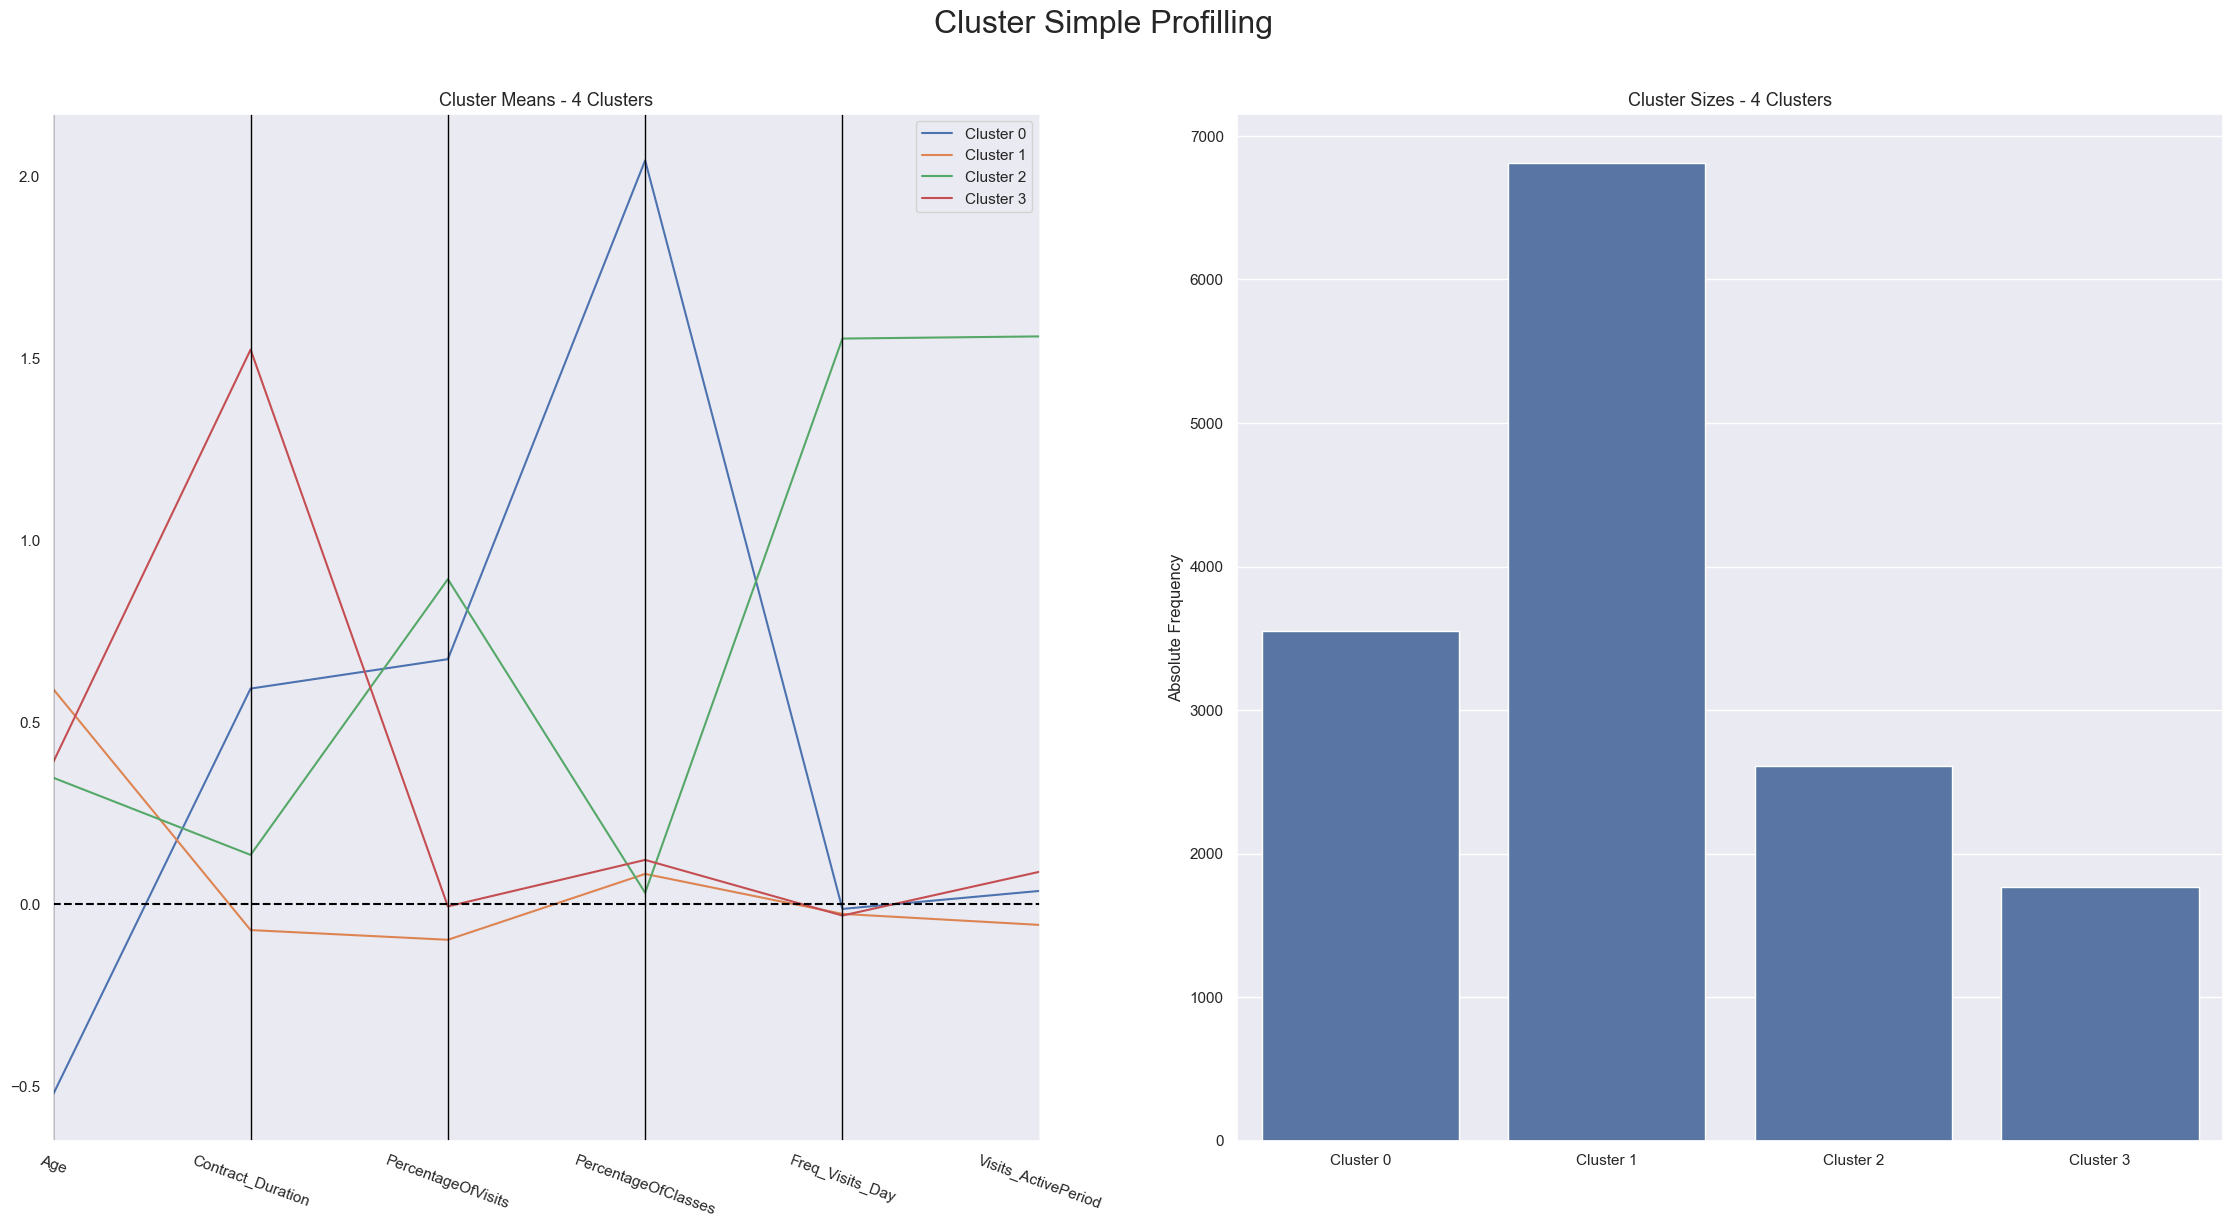

In [63]:
cluster_profiles(
    df = df_final[metric_features + ["label"]], 
    label_columns = ["label"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

## Gaussian Mixture Model:

**Gaussian Mixture Models** help represent normally distributed subpopulations within an overall population.\
It is a good model to use when clusters have different sizes, shapes, and orientations, so it is a possible approach to comprehend clusters we couldn't find before.

Assumes data is a mixture of Gaussians and is a good model for complex cluster shapes and overlapping clusters.

We need to define the **covariance_type** hyperparameter, that defines the degree of freedom in the shape of each cluster and the **n_components**:

We use **BIC** and **AIC** to define our best parameters, being the smallest value for these metric the best one (considering n_components = 4 as was used for the other models)

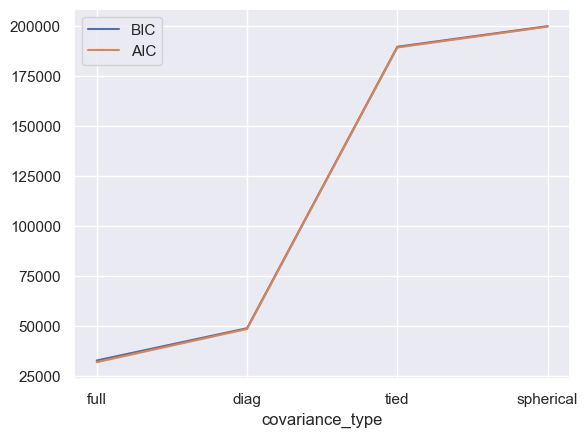

In [65]:
# Selecting covariance type based on AIC and BIC
cov_type = ['full','diag', 'tied', 'spherical']
models = [GaussianMixture(n_components=4, covariance_type=t, n_init=10, random_state=1).fit(df_general)
          for t in cov_type]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_general) for gmm in models]
aic_values = [gmm.aic(df_general) for gmm in models]
plt.plot(cov_type, bic_values, label='BIC')
plt.plot(cov_type, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('covariance_type')
plt.xticks(cov_type)
plt.show()

The smallest metrics ocur for "full".

We also verify is *n_componets* = 4 is a good number of clusters to consider fot this specific model:

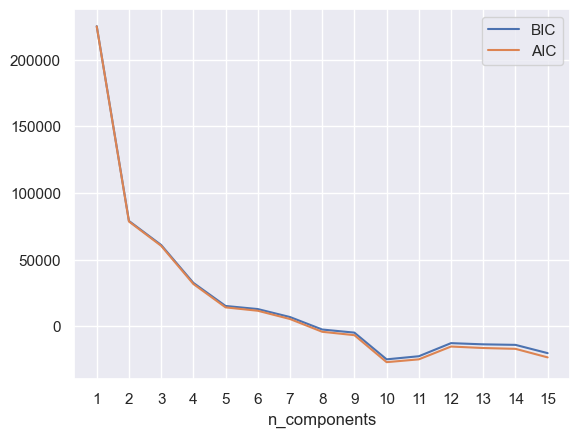

In [66]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 7)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_general)
          for n in n_components]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_general) for gmm in models]
aic_values = [gmm.aic(df_general) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

Since we are comparing clustering algorithms with 4 clusters and the value *n_componets = 4* has both metrics close to 0, this value is kept.

The model was not achieving good results using defined values for *tol* (when the change resulting from an iteration is smaller tolerances, the iterations are terminated) and *reg_covar*, smaller values were selected: 

""The **covariance matrix** specifies the spread and orientation of the distribution. Along the diagonal of this covariance matrix we have the variance t  representing the shape (spread) along each of the dimensions. But then we also have the off-diagonal terms (these two thing actually take the same value because this a symmetric matrix) that specify the correlation structure of the distribution.""

""Regularization is applied to the diagnoals to prevent clusters from spreading too much (covariance matrix becoming too large).""

In [135]:
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='k-means++', random_state=1, max_iter=3000, tol =1*10**-6,reg_covar = 1*10**-7)
gmm_labels = gmm.fit_predict(df_general)
labels_proba = gmm.predict_proba(df_general)
gmm_labels

array([3, 3, 1, ..., 1, 3, 3])

In [136]:
c= Counter(gmm_labels)
c

Counter({2: 5092, 1: 3679, 3: 3163, 0: 2604})

In [137]:
counter = []
for n in range(0,4):
    counter.append(round(c[n]/df_general.shape[0],4))
counter

[0.1791, 0.2531, 0.3503, 0.2176]

In [138]:
df_gmm = pd.concat([data, pd.Series(gmm_labels, index=data.index, name="gmm_labels")], axis=1)

In [139]:
sst = get_ss(df_gmm[general_perspective])  # get total sum of squares
ssw_labels = df_gmm[general_perspective + ["gmm_labels"]].groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.2300


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


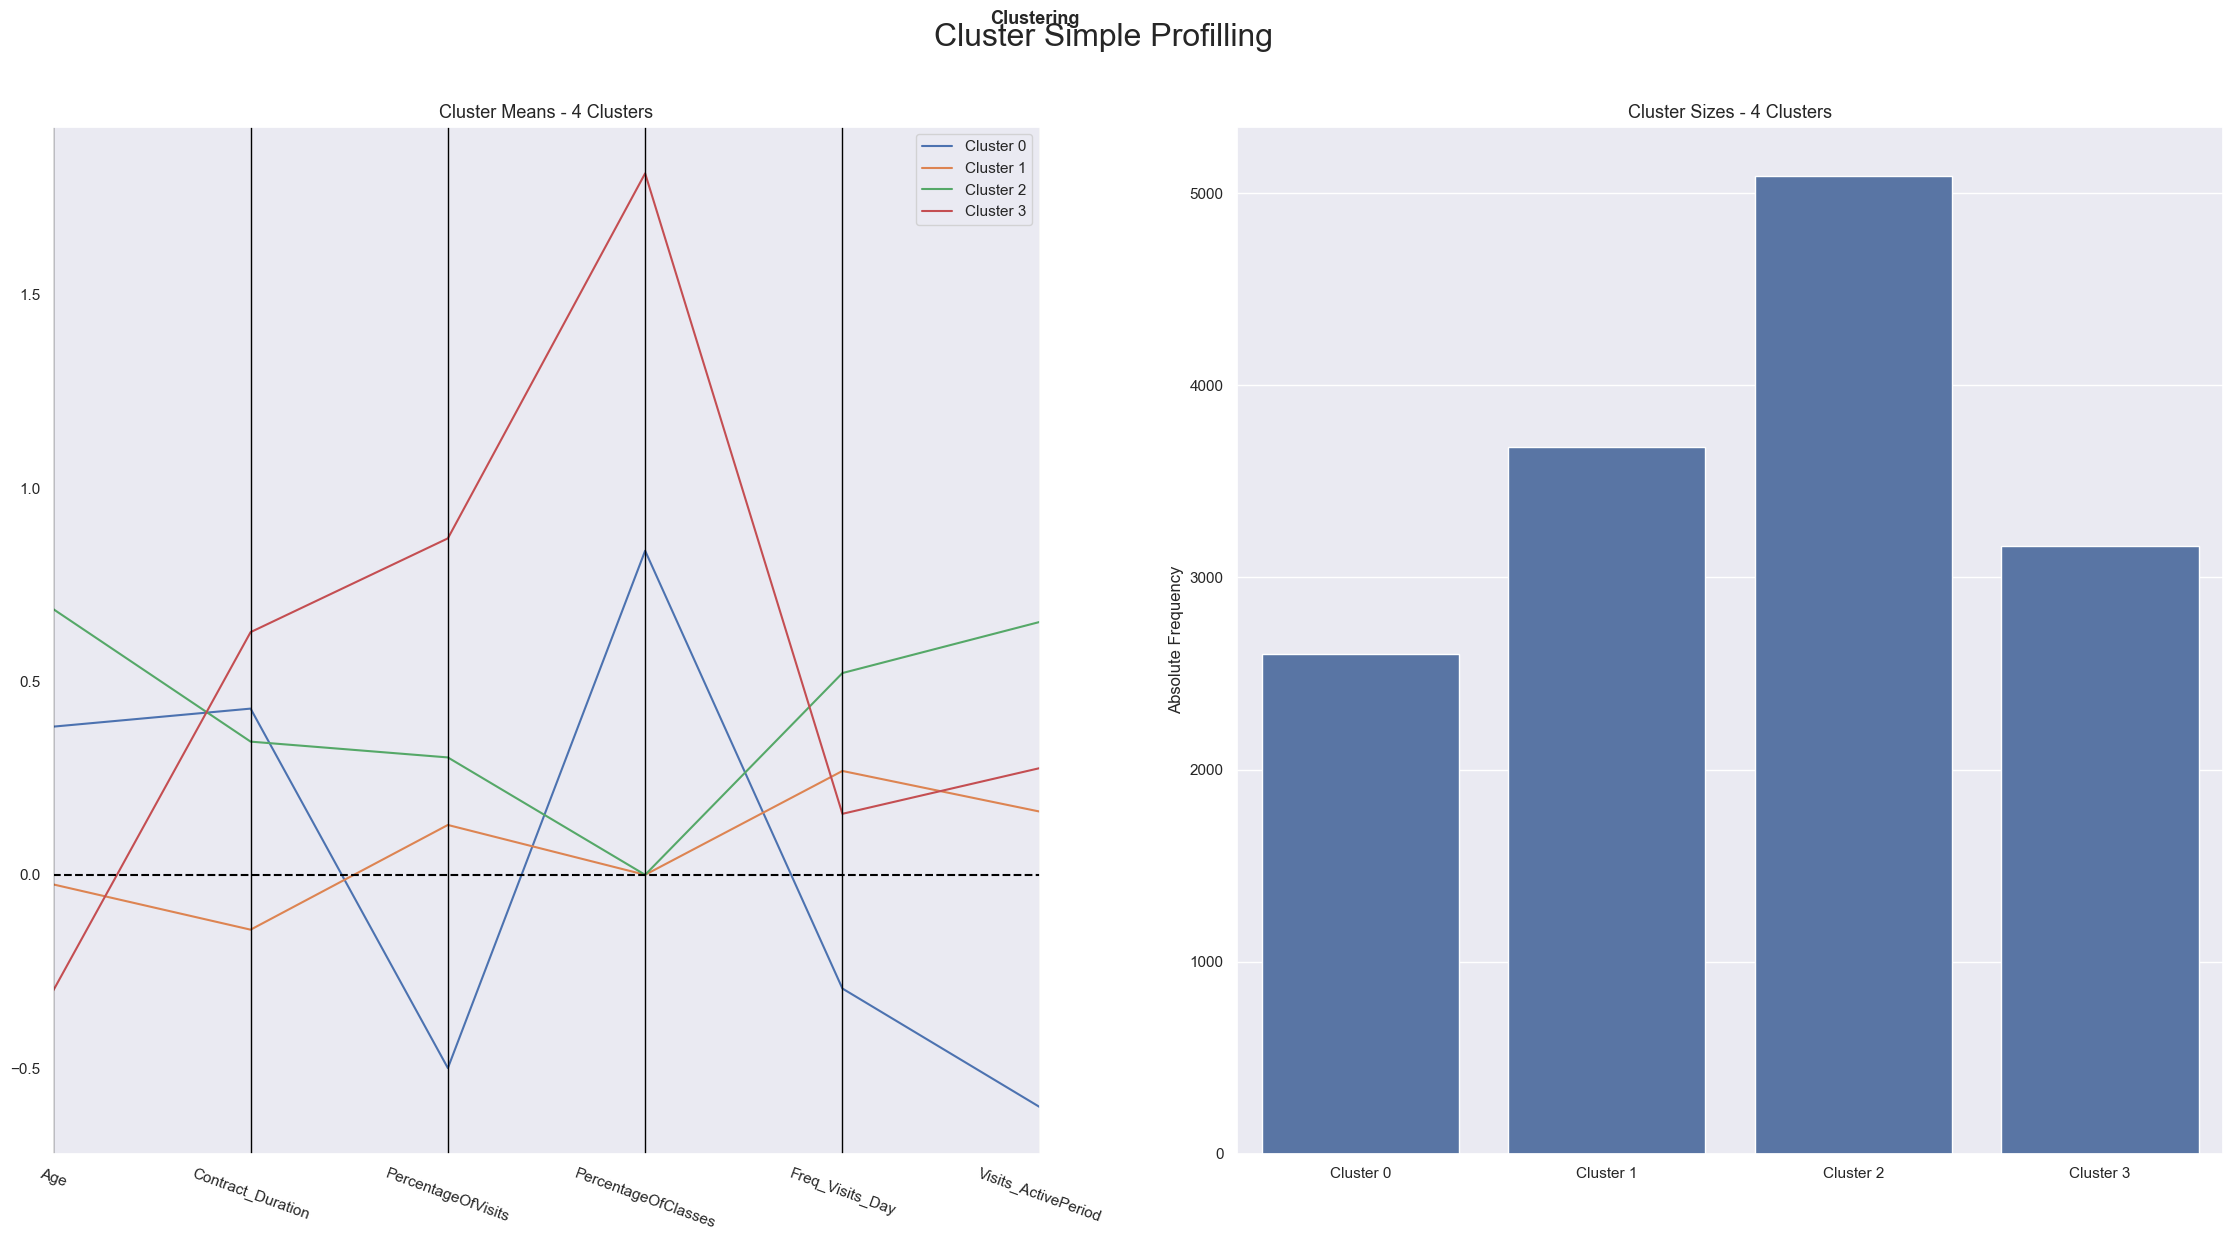

In [140]:
cluster_profiles(
    df = df_gmm[general_perspective + ["gmm_labels"]], 
    label_columns = ["gmm_labels"], 
    figsize = (28, 13), 
    compar_titles = ["Clustering"]
)

In [141]:
df_act= df_gmm[["gmm_labels"] + activities].groupby(["gmm_labels"]).sum()
df_compare= df_gmm[["gmm_labels"] + compare].groupby(["gmm_labels"]).sum()

We study the percentage of people who do an activity belong to this group. Since our activities are very unbalanced, this way we can see what percentage of all participants belong to a certain group:

In [142]:
df_act.apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

In [143]:
df_compare.apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)